In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib        as mpl
import sys
# import tqdm
import torch

from torch.utils.tensorboard import SummaryWriter

from matplotlib          import rcParams
rcParams.update({'figure.dpi': 200})
mpl.rcParams.update({'font.size': 8})
plt.rcParams['figure.dpi'] = 150

## import own functions
sys.path.insert(1, '/lhome/silkem/MACE/MACE/src/mace')
import autoencoder  as ae
import dataset      as ds
import train        as tr
import neuralODE    as nODE

In [2]:
## Set up PyTorch 
cuda   = False
DEVICE = torch.device("cuda" if cuda else "cpu")
batch_size = 1 ## if not 1, dan kan er geen tensor van gemaakt worden
epochs = 1
lr = 0.01

kwargs = {'num_workers': 1, 'pin_memory': True} 

dirname = 'easy-mace2'
writer = SummaryWriter('runs/'+dirname)

train, data_loader, test_loader = ds.get_data(dirname = dirname, batch_size=batch_size, kwargs=kwargs, plot = True, scale = None)
model = nODE.Solver(p_dim=4,z_dim = 10, n_dim=466, DEVICE = DEVICE)

In [5]:
## Training & validating model

loss_train_all, loss_test_all = tr.train(model, lr, data_loader, test_loader, epochs, DEVICE)
# n_test, n_test_hat, loss = tr.test(model, test_loader, DEVICE)

Model:         
learning rate: 0.01

>>> Training model...
[[-0.20000000298023224, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -0.20000000298023224, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, -0.20000000298023224, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, -0.20000000298023224, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, -0.20000000298023224, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, -0.20000000298023224, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.20000000298023224, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.20000000298023224, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.20000000298023224, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.20000000298023224]]
len tstep     torch.Size([1, 12])
stats         {'n_f_evals': tensor([1022]), 'n_steps': tensor([170]), 'n_accepted': tensor([165]), 'n_initialized': tensor([12])}
status        tensor([0])
[[-0.20000000298023224, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

KeyboardInterrupt: 

tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

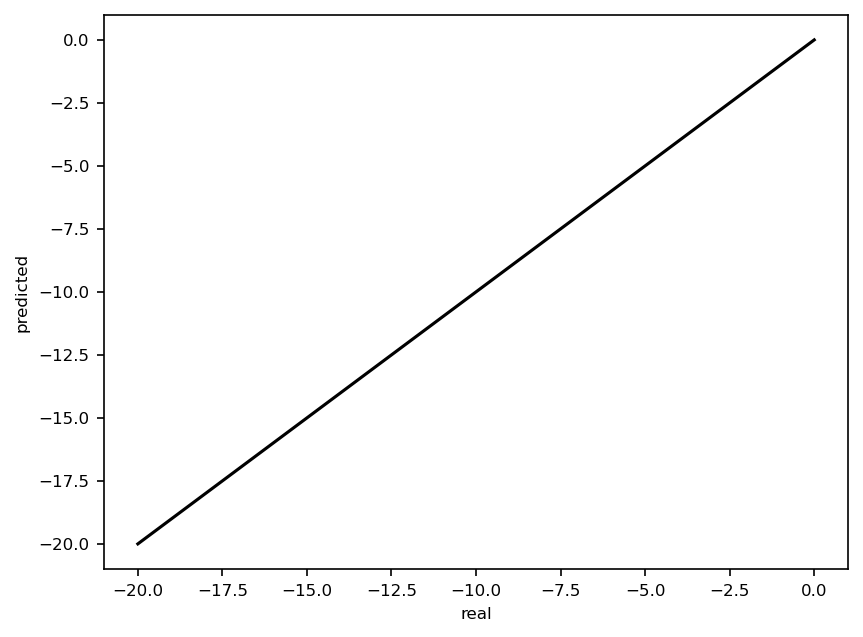

In [12]:
i = 0
x = np.linspace(-20,0,100)
print(n_test_hat[0][i])
print(n_test[0][i])
plt.plot(n_test[0][i],n_test_hat[0][i], 'o')
plt.plot(x,x,c='k')

plt.xlabel('real')
plt.ylabel('predicted')
plt.show()

### Testing seperately

In [7]:
enc = ae.Encoder( 466, 100, 10)
dec = ae.Decoder(10,100,466)

i = 849
n_test = train[i][0]
n_0    = n_test[:,0]
p      = train[i][1]
t      = train[i][2]

In [8]:
t

tensor([0.0000e+00, 2.5437e-01, 5.0875e-01, 3.0525e+00, 5.5962e+00, 3.1034e+01,
        5.6471e+01, 2.9249e+02, 5.2850e+02, 7.6452e+02, 1.4501e+03, 2.1358e+03,
        2.5070e+03])

In [6]:
z_0= enc(n_0)

z_0

tensor([ 0.0720, -0.0019,  0.0513,  0.1139, -0.0147,  0.0510,  0.0316,  0.0399,
         0.0076,  0.0217], grad_fn=<LeakyReluBackward0>)

In [7]:
g = nODE.G(4,10)
# z = z_0.view(1,10)
# g_fun = nODE.G.forward(g,t,z,p)
# print(g_fun)

torch.Size([100])


In [11]:
A = nODE.A(466, 10)
print(A.layer_out.bias.data)

torch.Size([100])
tensor([-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., -1.])


In [14]:
A = model.g.a(p)
# torch.linalg.eig(A)
print(A)

tensor([[-0.0937,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000, -0.0122,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000, -0.1152,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000, -0.1666,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000, -0.1707,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.0173,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.1905,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.1431,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         -0.0206,  0.0000],
        [ 0.0000,  

In [9]:
n_s = model(n_0, p, t.view(1,-1))
n_s

len tstep     torch.Size([1, 13])
stats         {'n_f_evals': tensor([878]), 'n_steps': tensor([146]), 'n_accepted': tensor([143]), 'n_initialized': tensor([13])}
status        tensor([0])


tensor([[[ 0.1438,  0.0965,  0.1282,  ..., -0.0274,  0.0676, -0.0071],
         [ 0.1438,  0.0964,  0.1282,  ..., -0.0274,  0.0675, -0.0070],
         [ 0.1437,  0.0964,  0.1282,  ..., -0.0274,  0.0675, -0.0070],
         ...,
         [ 0.1378,  0.0974,  0.1267,  ..., -0.0273,  0.0671, -0.0062],
         [ 0.1378,  0.0974,  0.1267,  ..., -0.0273,  0.0671, -0.0062],
         [ 0.1378,  0.0974,  0.1267,  ..., -0.0273,  0.0671, -0.0062]]],
       grad_fn=<ReshapeAliasBackward0>)